In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <span style="color:red">ch2. 한글 자연어처리 패키지</span>
# 1. 자연어처리

- 자연어 : 일상적인 언어
- 자연어 처리분야
    * 자연어 이해 : 형태소 분석 -> pos tagging(품사태깅) -> 의미분석(빈도분석, 연관분석) 
    * 자연어 이해 & 생성 : RNN/LSTM/GRU -> seq2seq -> 트랜스포머
- 활용분야 : 트랜드분석, 탐색적분석, 맞춤법검사, 번역기, 쳇봇

# 2. 자연어 이해/생성 처리 절차

- 전처리 : 단어/어절 추출(특수문자 ㅎㅎ ^-^제외)
- 분석 후보 생성 : 형태소 분리, 품사태깅
- 제약조건 : 불용어 처리, 규칙 확인
- 분석 : 시각화(워드클라우드, Text), 유사성 분석, 연관분석, RNN/LSTM/GUR,...

# 3. 형태소 분석 엔진

- Konlpy (pip install konlpy)
    * HanNanum :java로 만든 형태소 분석기(JAVA_HOME 환경변수설정, Path 설정)
    * Kkma     :java로 만든 형태소 분석기(JAVA_HOME 환경변수설정, Path 설정)
    * Komoran  :java로 만든 형태소 분석기(JAVA_HOME 환경변수설정, Path 설정)
    * Okt      :java로 만든 형태소 분석기(JAVA_HOME 환경변수설정, Path 설정)
- Mecab (pip install python-mecab-ko)
    * Mecab : C++로 만든 형태소 분석기. 저사양환경에서 사용가능
- 공통기능 : morphs(행태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사태그)

- pos tagging chat 다운로드
    * 구글에서 konlpy docs 검색 => https://konlpy.org/en/latest/
    * api 메뉴 -> Compare POS tags between several Korean analytic projects. (In Korean)
    *

In [3]:
%pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.4 MB 5.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/19.4 MB 5.3 MB/s eta 0:00:04
   ------ --------------------------------- 3.1/19.4 MB 5.8 MB/s eta 0:00:03
   --------- ------------------------------ 4.7/19.4 MB 6.2 MB/s eta 0:00:03
   ------------- -------------------------- 6.6/19.4 MB 7.1 MB/s eta 0:00:02
   ------------------ --------------------- 8.9/19.4 MB 7.7 MB/s eta 0:00:02
   ---------------------- ----------------- 11.0/19.4 MB 8.1 MB/s eta 0:00:02
   ------------------------- -------------- 12.3/19.4 MB 7.9 MB/s eta 0:00:01
   ---------------------------- ----------- 13.6/19.4 MB 7.7 MB/s eta 0:00:01
   ------------------------------- -------- 15.5/19.4 MB 7.8 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.4 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.4 MB 8.2 MB/s eta 0:00:01


In [4]:
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install python-mecab-ko

   ---------------------------------------- 0.0/652.4 kB ? eta -:--:--
   ---------------------------------------- 652.4/652.4 kB 26.0 MB/s  0:00:00
   ---------------------------------------- 0.0/34.5 MB ? eta -:--:--
   ------------- -------------------------- 11.8/34.5 MB 56.8 MB/s eta 0:00:01
   --------------------------- ------------ 23.3/34.5 MB 56.7 MB/s eta 0:00:01
   ---------------------------------------  34.3/34.5 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------- 34.5/34.5 MB 50.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [python-mecab-ko-dic]
   ---------------------------------------- 0/2 [python-mecab-ko-dic]
   ---------------------------------------- 2/2 [python-mecab-ko]

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip show python-mecab-ko

Name: python-mecab-ko
Version: 1.3.7
Summary: A python binding for mecab-ko
Home-page: https://github.com/jonghwanhyeon/python-mecab-ko
Author: Jonghwan Hyeon
Author-email: jonghwanhyeon93@gmail.com
License: BSD 3-Clause License
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: python-mecab-ko-dic
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
%pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/24.4 MB 15.1 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/24.4 MB 18.0 MB/s eta 0:00:02
   --------------- ------------------------ 9.4/24.4 MB 17.3 MB/s eta 0:00:01
   --------------- ------------------------ 9.4/24.4 MB 17.3 MB/s eta 0:00:01
   -------------------------- ------------- 16.3/24.4 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------  24.1/24.4 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 24.4/24.4 MB 19.1 MB/s  0:00:01

   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   ---------------------------------------- 2/2 [gensim]

Note: you may need to restart the kernel

In [11]:
%pip show gensim

Name: gensim
Version: 4.4.0
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: numpy, scipy, smart_open
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [13]:
import konlpy
konlpy.__version__   # 에러나는 경우 jpype1 라이브러리를 수동설치(현버전에서는 X)

'0.6.0'

In [1]:
text= """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다."""

## 3.1 HanNanum

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None) # 기본값 :1024MB  기가일때는 '1g'/ 메가일때 '10m'
# 입력된 텍스트를 가장 세밀하게 분석해서 형태소, 품사,원형 등의 후보군을 모두 반환
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [3]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [4]:
# 명사만 추출 : nouns
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [7]:
# 품사태깅 : pos
print(hannanum.pos(text,ntags=9))  # 품사갯수 기본값 :ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [8]:
print(hannanum.pos(text,ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [9]:
# print(hannanum.pos(text,ntags=26))

Exception: ntags in [9, 22]

In [15]:
%%time
# 퀴즈1. pos tag 결과에서 명사(NC,NQ,NB,NN)만 추출하기 
tagged_text = hannanum.pos(text,ntags=22)
[token for token, tag in tagged_text if tag in ('NC','NQ','NB','NN')]

CPU times: total: 0 ns
Wall time: 8.21 ms


['복잡', '한국어', '전세계', '13', '번', '사용', '언어']

In [16]:
# 퀴즈2. text에서 보통명사(NC)만 추출하기 
[token for token, tag in tagged_text if tag=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

In [17]:
# 퀴즈1.text에서 형용사(PA)만 추출하기 
[token for token, tag in tagged_text if tag=='PA']

['아름답', '많']

## 3.2 Kkoma

In [18]:
from konlpy.tag import Kkma
kkma = Kkma()
# 형태소 분석
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [19]:
# 명사추출
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [22]:
# 품사태그
print(kkma.pos(text))

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [26]:
# 품사태그를 통해 명사만 추출('NNG','NNP','NNB','NNM','NR','NP')
tagged_text = kkma.pos(text)
[token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNM','NR','NP')]

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']

In [27]:
# 품사태그를 통해 보통명사만 추출
[token for token, tag in tagged_text if tag =='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3. Komoran 

In [31]:
text= """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다."""

In [28]:
from konlpy.tag import Komoran
komoran = Komoran()
# 형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [29]:
# 명사추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [30]:
# 품사태그
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [32]:
# 품사태그를 통해 명사만 추출('NNG','NNP','NNB','NR','NP')
tagged_text = kkma.pos(text)
[token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NR','NP')]

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']

In [33]:
# 품사태그를 통해 보통명사만 추출
[token for token, tag in tagged_text if tag =='VA']

['아름답']

## 3.4 Twitter(Okt; Open Korean Text)

- sns 텍스트 분석용 개발


In [43]:
%%time
from konlpy.tag import Okt,Twitter
# okt = Twitter()
okt = Okt()
# 형태소 분석
#print('명사구 추출 :', okt.phrases(text))
print(' 1.형태소 추출  :',okt.morphs(text))
print(' 2.명사 추출 :', okt.nouns(text))
tagged_text = okt.pos(text)
print(' 3.품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag =='Noun']
     )
print(' 4.품사 태깅  :', tagged_text)

 1.형태소 추출  : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '\n', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다', '.']
 2.명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
 3.품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
 4.품사 태깅  : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('\n', 'Foreign'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
CPU times: total: 93.8 ms
Wall time: 74.1 ms


## 3.5 Mecab

    - pip install python-macab-ko
    - 압도적 속도(konlpy 대비 5배 ~ 15배 빠름)
    - 낮은 메모리 사용량
    - 형태소 분해 정확도 높음

In [49]:
%%time
from mecab import MeCab
mecab = MeCab()
print('- 1. 형태소 추출 :', mecab.morphs(text))
print('- 2. 명사 추출 :', mecab.nouns(text))
tagged_text = mecab.pos(text)
print('- 3. 품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag in ('NNG','NNP', 'NNB', 'NNBC')]
     )
print('- 4. 품사 태깅 :', tagged_text)

- 1. 형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다', '.']
- 2. 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
- 3. 품사 태깅을 이용한 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
- 4. 품사 태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
CPU times: total: 15.6 ms
Wall time: 4.99 ms


# 4. 말뭉치

In [54]:
# 영어말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:10]

'[Emma by J'

In [60]:
# 한글말뭉치
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :',len(data))

글자수 : 18884


# 5. 워드 클라우드
- pip install wordcloud

In [62]:
nouns = ['word1','word2','word1','word2']
' '.join(nouns)

'word1 word2 word1 word2'

In [68]:
# emma 말뭉치에서 단어(특수문자 제외) 추출 --> 명사(NN,NNS,NNP,NNPS)추출 -> 연결 -> 워드클라우드
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[0-9a-zA-Z]{2,}')
words = ret.tokenize(emma)
#words[:3]
# pos  tagging -> 명사추출
emma_tags = pos_tag(words)
#emma_tags[:3]
noun_list = [token for token, tag in emma_tags if tag in ('NN','NNS','NNP','NNPS')]
#noun_list
# 연결
emma_noun = ' '.join(noun_list)
# emma_noun
print('워드 클라우드를 그릴 text내용  :', emma_noun[:20])

워드 클라우드를 그릴 text내용  : Emma Jane Austen VOL


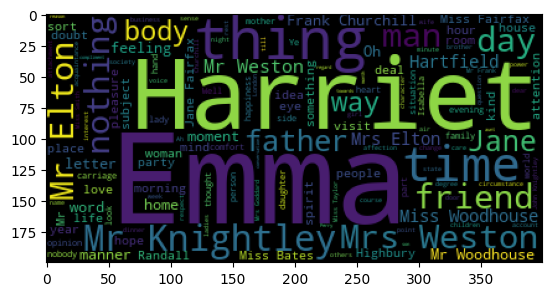

In [70]:
# 워드 클라우드 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵 : https://wikidocs.net/141538 또는 강사님 자료



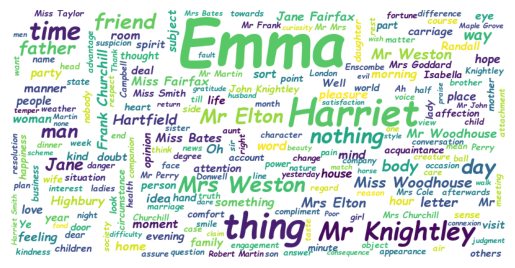

In [86]:
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/comicz.ttf',
    background_color='white', # 배경색
    width=800, height=400, # 생성될 이미지 가로 세로(픽셀)
    max_words = 300, # 최대 표시될 단어 갯수
    relative_scaling=0.9, #단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    max_font_size=100, #최대 폰트 사이즈
    min_font_size=10, # 최소 폰트 사이즈
    random_state=42   # 결과를 일관되도록 그리기 위한 random seed값
)
wordcloud.generate(emma_noun)
#plt.figure(figsize=(20,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [93]:
# data에서 명사추출 -> 빈도수 파악
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = MeCab() # mecab, Kkma의 경우 NNG, NNP / Okt의 경우 None
# noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP')]
# data 한글 말뭉치로 워드 count
from nltk import FreqDist
import pandas as pd
noun_wordcount = FreqDist(noun_list)
wordcnt = pd.Series(noun_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(10)

법률     121
대통령     84
조       79
국가      73
헌법      69
국민      69
국회      69
때       55
필요      31
위원      30
dtype: int64

명사 추출 : ['대한민국', '헌법', '역사', '전통', '국민']
워드클라우드를 그릴 data : 대한민국 헌법 역사 전통 국민 운동 


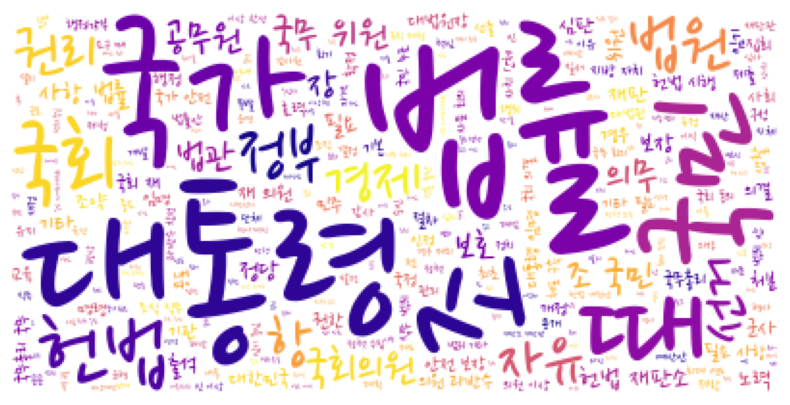

In [111]:
# data에서 명사추출 -> 연결 -> 워드클라우드
data_noun =  ' '.join(noun_list)
print('명사 추출 :',noun_list[:5])
print('워드클라우드를 그릴 data :',data_noun[:20])
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [114]:
# 불용어(불용어 지정 + 불용어 사전)
from wordcloud import STOPWORDS
#STOPWORDS
# 불용어
불용어 = STOPWORDS | {'대통령','조','때','항'}  # | : 집합 합 연산자
# a= {'네모','세모'}
# b= {'네모','동그라미'}
# a|b
불용어 = {'대통령','조','때','항'}
불용어

{'대통령', '때', '조', '항'}

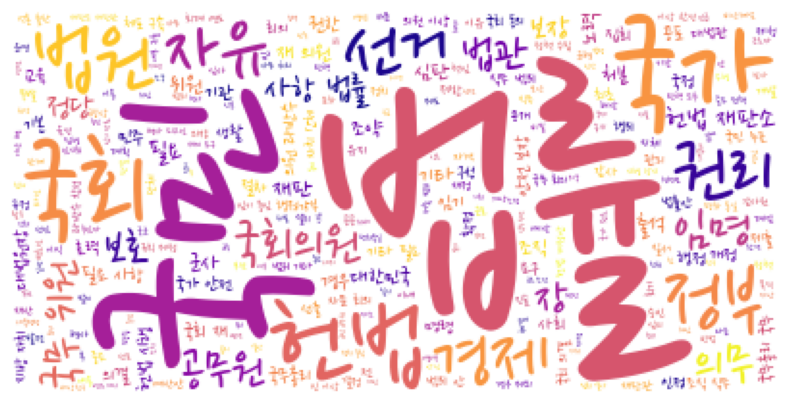

In [117]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어 # 불용어
    
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (468, 720, 3))

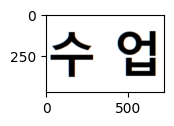

In [119]:
# 이미지를 넘파이배열로 (방법1)
import cv2 
mask = cv2.imread('data/test.png')
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask),mask.shape # 3채널 이미지

(numpy.ndarray, (468, 720, 3))

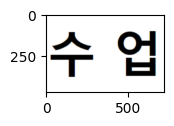

In [123]:
# 이미지를 넘파이배열로 (방법2)
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask),mask.shape

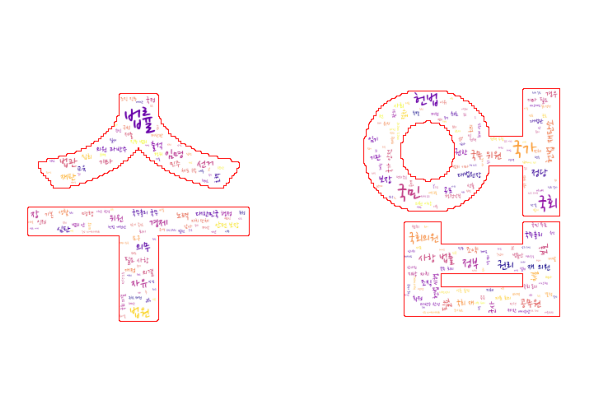

In [126]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어, # 불용어
    mask=mask ,
    contour_color='red', # 테두리 색생
    contour_width=1      # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1600, 1600))

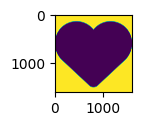

In [129]:
#mask= cv2.imread('data/heart.jpg')
img = Image.open('data/heart.jpg')
mask =np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)  #plt.imshow(mask,cmap='gray')
type(mask),mask.shape # 흑백이미지

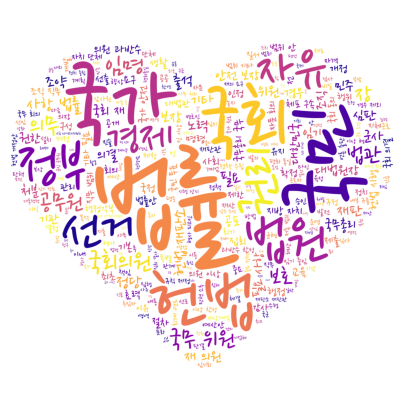

In [131]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어, # 불용어
    mask=mask ,
#     contour_color='red', # 테두리 색생
#     contour_width=1      # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



(numpy.ndarray, (241, 257, 3))

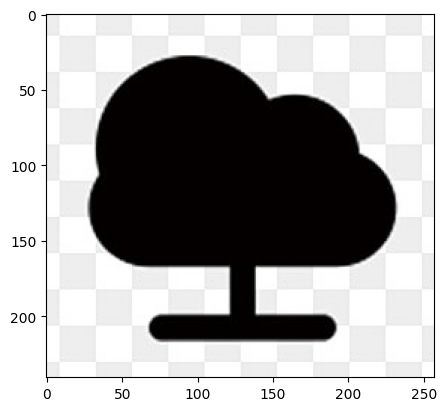

In [136]:
#mask2 = cv2.imread('data/test2.jpg')
img = Image.open('data/test2.jpg')
mask=np.array(img)
plt.figure(figsize=(5,5))
plt.imshow(mask)  #plt.imshow(mask,cmap='gray')
type(mask),mask.shape # 3채널이미지

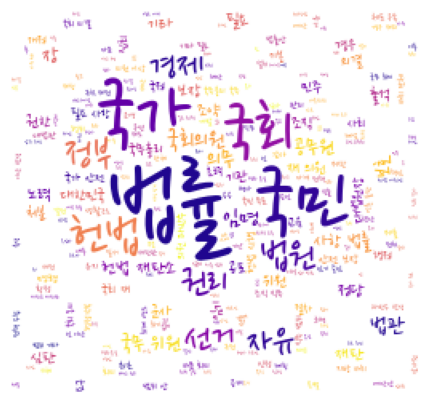

In [137]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어, # 불용어
    mask=mask ,
#     contour_color='red', # 테두리 색생
#     contour_width=1      # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### * 이미지전처리

mask 데이터 하나하나의 타입 : uint8
mask 데이터 하나하나의 타입 : uint8


(numpy.ndarray, (241, 257, 3))

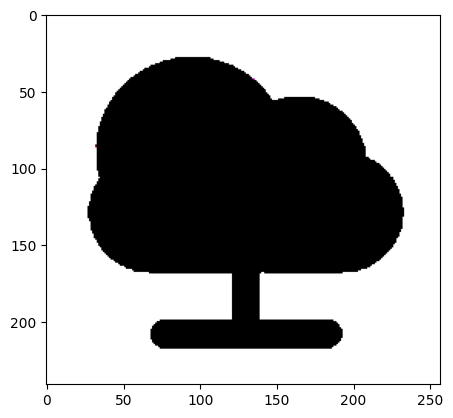

In [143]:
# 이미지전처리  : 옅은 회색 -> 하얀색 
#mask2 = cv2.imread('data/test2.jpg')
img = Image.open('data/test2.jpg')
mask=np.array(img)
print('mask 데이터 하나하나의 타입 :', mask.dtype) # uint8
mask = np.where(mask>200,255,0).astype(np.uint8)
print('mask 데이터 하나하나의 타입 :', mask.dtype) # uint8
# plt.figure(figsize=(5,5))
plt.imshow(mask)  #plt.imshow(mask,cmap='gray')
type(mask),mask.shape # 3채널이미지

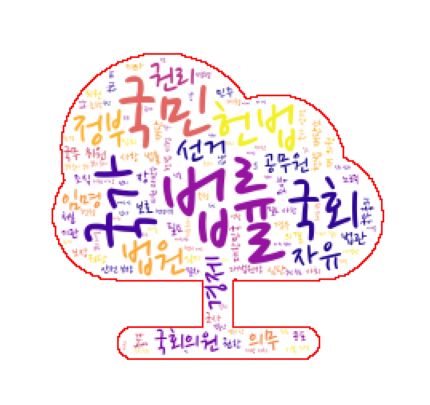

In [145]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    #relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어, # 불용어
    mask=mask ,
    contour_color='red', # 테두리 색생
    contour_width=1      # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)


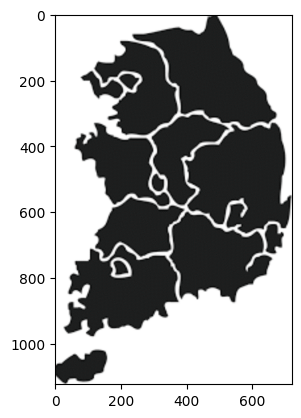

In [146]:
# 1채널 이미지 -> 3채널이미지
img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.imshow(mask)
print(mask.shape)

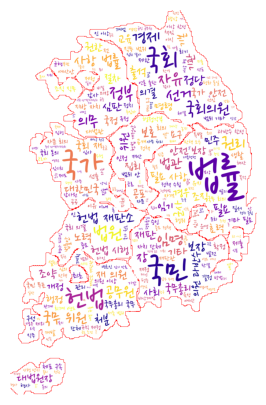

In [149]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    max_words=300,
    relative_scaling=0.6, # 단어빈도에 따른 크기; 차이 조정
    colormap='plasma', # 글씨 칼라맵
    stopwords=불용어, # 불용어
    mask=mask ,
    contour_color='red', # 테두리 색생
    contour_width=1      # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [150]:
# 생성된 워드클라우드 저장
wordcloud.to_file('data/korea.jpg') # jpg나 png

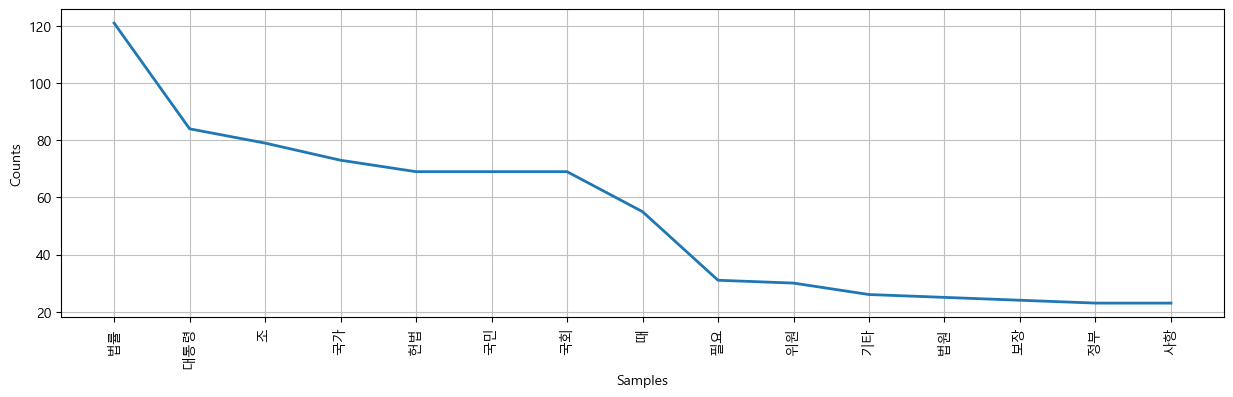

In [152]:
# 단어의 빈도수를 그래프로 시각화(nltk.Text)
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font',family='Malgun Gothic') # 윈도우즈에서 한글 처리
data_text.plot(15)
plt.show()